# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

##  Optical recognition of handwritten digits dataset

 jest zbiorem ręcznie pisanych cyfr.

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

### Wczytanie danych 

Jest wiele sposobów załadowania danych mnist do pamięci. Możemy skorzystać z funkcji `fetch_mldata`. Ważne jest by nie umieszczać danych w katalogu domowym. Możemy użyc katalogu `/tmp`. Ponieważ potrzebujemy danych tyko do odczytu, wystarczy jedna kopia dla wszystkich.

In [3]:
from  sklearn import datasets

In [4]:
nist = datasets.load_digits()

In [5]:
print(nist.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

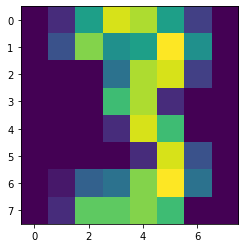

In [6]:
plt.imshow(nist.data[13].reshape(8,8))

### Zadanie 1.

Dokonaj podziału danych i etykiet na dwa zbiory - trenujący i testowy o rozmiarach w stosunkiu 5:1.

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
x = nist.data.astype(np.float32)
y = nist.target

train,test,train_labels,test_labels = train_test_split(x,y,test_size = 0.2)
print(train[123].dtype)
print(train[123].shape)
print(train.shape)
print(y.shape)

NameError: name 'train_test_split' is not defined

In [6]:
assert train.shape == (1437, 64)
assert test.shape ==  (360, 64)
assert train_labels.shape == (1437,)
assert test_labels.shape == (360,)
assert train[123].dtype == np.float32
assert train[123].shape == (64,)

NameError: name 'train' is not defined

### Zadanie 2.

Wyświetl dla losowego przykładu etykietę oraz cyfrę. Zauważ, że cyfry są obrazkami `8x8`.

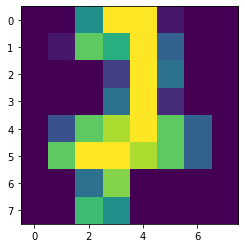

In [9]:
# YOUR CODE HERE
#raise NotImplementedError()
import random
i= random.randint(0,len(test))
plt.imshow(test[i].reshape(8,8))
plt.show()

## NIST

Wykonaj klasyfikacje klasyfikatorem liniowym.
Jedną z możliwoście jest 

In [10]:
from sklearn.linear_model import LogisticRegression

clf = None
# YOUR CODE HERE
clf = LogisticRegression(random_state=0,multi_class='ovr').fit(train,train_labels)

print(clf.coef_.shape)
print(clf.intercept_.shape)
clf.score(test,test_labels)
#raise NotImplementedError()

(10, 64)
(10,)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9694444444444444

In [11]:
assert clf.coef_.shape == (10,64)
assert clf.intercept_.shape == (10,)
assert clf.score(test,test_labels) > 0.95
assert clf.score(test,test_labels) < 0.98

## NIST z klasyfikatorem kNN

Korzystając z pakietu `sklearn` poklasyfikuj dane MNIST.


In [12]:
# YOUR CODE HERE
#raise NotImplementedError()
knn = KNeighborsClassifier(n_neighbors=7,n_jobs=1).fit(train,train_labels)
knn.score(test,test_labels)

0.9833333333333333

### Predykcja

Znajdź przykłady (np. 10 sztuk) dla których klasyfikator się pomylił. Zastanów się czy człowiek też mógłby się pomylić w tych przypadkach.

In [13]:
np.sum(clf.predict(test) == test_labels),test_labels.shape[0]

(349, 360)

In [14]:
test[1].shape

(64,)

In [15]:
test[1:2].shape

(1, 64)

[3] 9


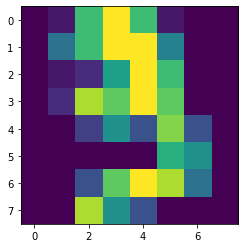

[3] 8


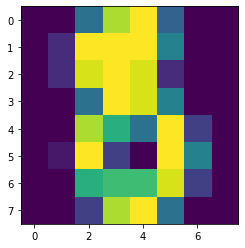

[0] 2


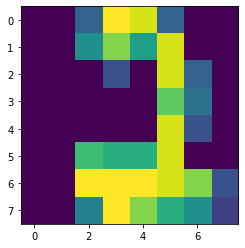

[1] 8


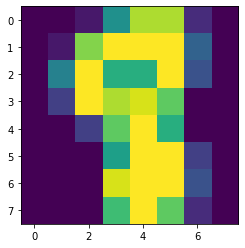

[1] 8


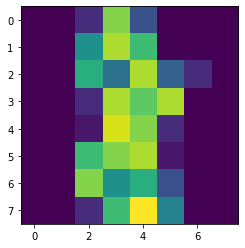

[5] 9


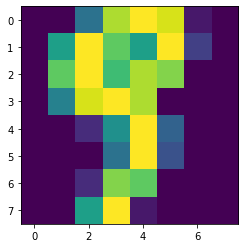

In [16]:
# YOUR CODE HERE
#raise NotImplementedError()
np.sum(knn.predict(test) == test_labels),test_labels.shape[0]
for i in range(len(test_labels)):
    #Z = knn.predict(test[i].reshape(1,-1))
    Z = knn.predict(test[i:i+1])
    P = test_labels[i]
    if Z != P:
        print(Z,P)
        plt.imshow(test[i].reshape(8,8))
        plt.show()

In [17]:
from sklearn import linear_model
from sklearn import preprocessing

##  NIST z klasyfikatorem liniowym

Poklasyfikuj dane MNIST klasyfikatorem SVM, korzystając z implementacji `linear_model.LogisticRegression()` 

- z dokumentacji przeczytaj jak zaimplementowana jest klasyfikacja wieloklasowa.


In [18]:
clf = None
# YOUR CODE HERE
#raise NotImplementedError()
clf = LogisticRegression(random_state = 0, multi_class='ovr').fit(train,train_labels)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
assert clf.score(test,test_labels) > 0.95
assert clf.predict_proba(test).shape[1] == 10

### Historgram

Narysuj histogram prawdopodobieństw klasyfikacji dla kilku dobrych i źle poklasyfikowanych przykładów 

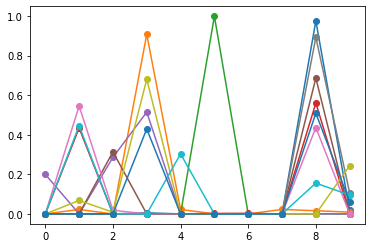

In [20]:
bad_idx = None

# YOUR CODE HERE
# raise NotImplementedError()
bad_idx = np.where(clf.predict(test) != test_labels)
pred = clf.predict_proba(test)[bad_idx]
for i in pred:
    plt.plot(i,'o-')


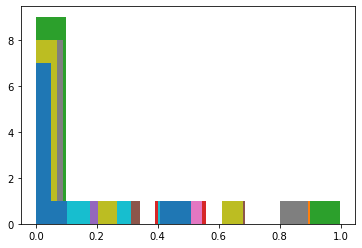

In [21]:
# YOUR CODE HERE
# raise NotImplementedError()
for i in pred:
    plt.hist(i)

### Macierz pomyłek

Wylicz i przedstaw graficznie  macierz pomyłek dla klasyfikatora liniowego.
Wykorzystaj zbiór testowy!

[[44  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  1  0]
 [ 0  0 32  1  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  2  0]
 [ 0  1  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  1  0  0  0 32  0  0]
 [ 0  1  0  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  0  0  0  2 34]]


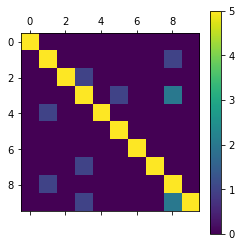

In [22]:
M = None 
# YOUR CODE HERE
#raise NotImplementedError()
from sklearn.metrics import confusion_matrix
M = confusion_matrix(test_labels,clf.predict(test))

print(M)
plt.matshow(M, vmax=5)
plt.colorbar()

In [23]:
assert M.shape == (10,10)
np.sum(M.diagonal()) > 0.9*test.shape[0]

True

##  NIST z klasyfikatorem SVM

Poklasyfikuj dane MNIST klasyfikatorem SVM, korzystając z implementacji `sklearn` 

 - należy zastosować skalowanie danych (np. `preprocessing.StandardScaler`)


In [29]:
# YOUR CODE HERE
#raise NotImplementedError()
from sklearn import svm
from sklearn import preprocessing
scaler = preprocessing.StandardScaler(with_std = True)
scaler.fit(train)
clf = svm.SVC(decision_function_shape='ovo',kernel='rbf')

clf.fit(scaler.transform(train),train_labels)

clf.score(scaler.transform(test),test_labels)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9833333333333333

In [30]:
np.sum(clf.predict(scaler.transform(test)) == test_labels),test_labels.shape[0]

(354, 360)

##  NIST z klasyfikatorem SVM w zredukowanej przestrzeni danych (PCA)

Wykonaj redukcję danych z pomocą PCA, np.:

    pca = decomposition.PCA(n_components=50, whiten=True,\
                            svd_solver='randomized')
                            
Zmniejszając wymiar przestrzeni można pokusić się o zwiększenie zbioru trenującego!

In [33]:
# YOUR CODE HERE
#raise NotImplementedError()
from sklearn import decomposition
pca = decomposition.PCA(n_components=50, whiten=True, svd_solver='randomized')
pca.fit(train)
train_pca = pca.transform(train)
test_pca = pca.transform(test)
clf = svm.SVC(decision_function_shape='ovo',kernel='rbf')
clf.fit(train_pca,train_labels)
clf.score(test_pca,test_labels)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9833333333333333